# Event Propensity - Yankees Clustering
* Customer Innovation & Impact
* Jessie Niles
* April 27, 2022

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

from pycaret.clustering import *
from pycaret.classification import *

## Hypothesis

Fill in your hypothesis here or explain why you're running this experiment

## Experiment - Loading Model

### Let's load in the v1 Event Propensity model from pycaret:

In [15]:
ep_model = load_model("models/MLB Yankees - Event Propensity (22Feb2022)")

Transformation Pipeline and Model Successfully Loaded


### Now that we have our model, let's load in a single Yankees game and get event propensity predictions for each fan:

In [17]:
df_inference = pd.read_parquet("inference")

In [18]:
df_inference = df_inference.fillna(value=0)
df_inference.shape

(7110804, 12)

In [19]:
df_inference.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7110804 entries, 0 to 7110803
Data columns (total 12 columns):
 #   Column               Dtype  
---  ------               -----  
 0   daysOut              object 
 1   eventDate            object 
 2   tenure               int64  
 3   dimCustomerMasterId  int32  
 4   events_purchased     float64
 5   frequency_opponent   float64
 6   frequency_eventDay   float64
 7   frequency_eventTime  float64
 8   inMarket             object 
 9   distanceToVenue      float64
 10  recent_openRate      float64
 11  recent_clickRate     float64
dtypes: float64(7), int32(1), int64(1), object(3)
memory usage: 623.9+ MB


In [20]:
df_inference.head()

,daysOut,eventDate,tenure,dimCustomerMasterId,events_purchased,frequency_opponent,frequency_eventDay,frequency_eventTime,inMarket,distanceToVenue,recent_openRate,recent_clickRate
0,Day Of,2022-05-23,1394,496035,1.0,0.0,0.0,1.0,False,236.03,0.0,0.0
1,1 to 3 Days Out,2022-05-23,1394,496035,1.0,0.0,0.0,1.0,False,236.03,0.0,0.0
2,4 to 7 Days Out,2022-05-23,1394,496035,1.0,0.0,0.0,1.0,False,236.03,0.0,0.0
3,Over a Week,2022-05-23,1394,496035,1.0,0.0,0.0,1.0,False,236.03,0.0,0.0
4,Day Of,2022-05-23,306,2637032,1.0,0.0,0.0,1.0,True,28.64,0.0,0.0


### Let's sample 10000 records for prediction as a first test:

In [21]:
df_inference_10000 = df_inference.sample(10000)
df_inference_10000.shape

(10000, 12)

### Let's run this sample dataset through our model to get predictions:

In [23]:
df_predictions = predict_model(ep_model, data=df_inference_10000, raw_score=True)
df_predictions.head()

,daysOut,eventDate,tenure,dimCustomerMasterId,events_purchased,frequency_opponent,frequency_eventDay,frequency_eventTime,inMarket,distanceToVenue,recent_openRate,recent_clickRate,Label,Score_0,Score_1
2710664,Day Of,2022-05-24,1775,1299806,1.0,0.0,0.0,1.0,True,9.75,0.0,0.0,0,0.8499,0.1501
2066502,4 to 7 Days Out,2022-05-23,1475,2382443,1.0,0.0,0.0,0.0,False,561.26,0.0,0.0,0,0.9986,0.0014
5629647,Over a Week,2022-05-25,1766,477581,1.0,0.0,0.0,1.0,False,1679.70,0.0,0.0,0,0.7767,0.2233
3042682,4 to 7 Days Out,2022-05-24,569,1667120,1.0,0.0,1.0,1.0,False,0.00,0.0,0.0,1,0.0024,0.9976
1623563,Over a Week,2022-05-23,1787,1938892,1.0,0.0,0.0,1.0,False,2991.24,0.0,0.0,0,0.8095,0.1905


In [24]:
df_predictions.Label.value_counts()

0    5655
1    4345
Name: Label, dtype: int64

In [ ]:
df_predictions = predict_model(ep_model, data=df_inference, raw_score=True)

In [30]:
df_predictions.Label.value_counts()

0    4046671
1    3064133
Name: Label, dtype: int64

In [34]:
df_buyers = df_predictions[df_predictions.Label == 1]

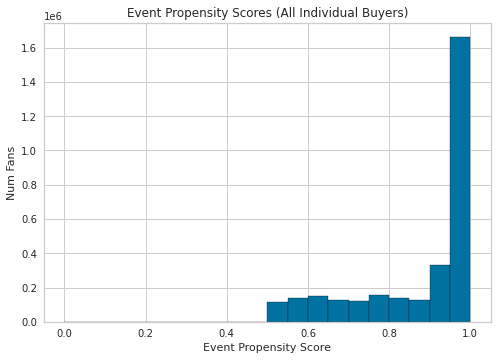

In [35]:
plt.title("Event Propensity Scores (All Individual Buyers)")
plt.ylabel("Num Fans")
plt.xlabel("Event Propensity Score")
plt.hist(df_buyers["Score_1"], bins=20, edgecolor="black", range=(0,1))

plt.show()